### Import necessary libraries for the experiment

In [108]:
# importing libraries
import tensorflow as tf
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences



from keras.preprocessing import text, sequence
from keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Input
from keras.layers import Dense, Input, LSTM, SimpleRNN, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D,GRU
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from sklearn.model_selection  import train_test_split
#from sklearn.cross_validation import train_test_split


# For custom metrics
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping 
import plotly.graph_objs as go
import plotly.offline as py

import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

plt.style.use('seaborn')

import seaborn as sns
from IPython.display import Image

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
from nltk.tokenize import word_tokenize
import string
import gensim
import os
import re

sns.set_style("whitegrid")
np.random.seed(0)


import plotly.graph_objs as go
import plotly



# Install dependencies
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

<ipython-input-108-ee559459b624>:34: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Double check with Python 3


### Loading the necessary data files and data Preparation

In [32]:
# Train Data
train = pd.read_csv('train.csv',encoding='utf-8',on_bad_lines='skip')
train=train[['id','comment_text','toxic','severe_toxic','obscene','threat','insult','identity_hate']]
train.head(10)

<ipython-input-32-e8e59106eea7>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv',encoding='utf-8',on_bad_lines='skip')


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [33]:
train.describe()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571,159571,159571,159571,159571,159571,159571,159571
unique,159571,159562,6,5,6,5,5,6
top,0000997932d777bf,#NAME?,0,0,0,0,0,0
freq,1,10,118487,129750,124115,130676,124604,129936


In [34]:
train.describe()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571,159571,159571,159571,159571,159571,159571,159571
unique,159571,159562,6,5,6,5,5,6
top,0000997932d777bf,#NAME?,0,0,0,0,0,0
freq,1,10,118487,129750,124115,130676,124604,129936


### Clean the Train data, specifically remove punctuations

In [35]:
totalContentCleaned = []
punctDict = {}
for punct in string.punctuation:
    punctDict[punct] = None
transString = str.maketrans(punctDict)
# since we intent to remove any punctuation with ''
for sen in train['comment_text']:
    p = sen.translate(transString)
    totalContentCleaned.append(p)
    

train['comment_text'] = totalContentCleaned




train.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,Daww He matches this background colour Im seem...,0,0,0,0,0,0
2,000113f07ec002fd,Hey man Im really not trying to edit war Its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,\nMore\nI cant make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0
5,00025465d4725e87,\n\nCongratulations from me as well use the to...,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word nonsense was offensive to yo...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [36]:
#Test data
df_test = pd.read_csv('test_Nlp.csv',encoding='utf-8',on_bad_lines='skip')
df_test=df_test[['id','comment_text']]
df_test.head(10)

<ipython-input-36-b6dc33276ef3>:2: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('test_Nlp.csv',encoding='utf-8',on_bad_lines='skip')


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


### Clean the Test data, specifically remove punctuations

In [37]:
totalContentCleaned = []
punctDict = {}
for punct in string.punctuation:
    punctDict[punct] = None
transString = str.maketrans(punctDict)
# since we intent to remove any punctuation with ''
df_test=df_test.fillna({'comment_text':''})
for sen in df_test['comment_text']:
    p = sen.translate(transString)
    totalContentCleaned.append(p)
    

df_test['comment_text'] = totalContentCleaned




df_test.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then youll ...
1,0000247867823ef7,From RfC \n\n The title is fine as it is IMO
2,00013b17ad220c46,\n\n Sources \n\n Zawe Ashton on Lapland
3,00017563c3f7919a,If you have a look back at the source the info...
4,00017695ad8997eb,I dont anonymously edit articles at all
5,0001ea8717f6de06,Thank you for understanding I think very highl...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia Such e...
7,000247e83dcc1211,Dear god this site is horrible
8,00025358d4737918,\n Only a fool can believe in such numbers \n...
9,00026d1092fe71cc,Double Redirects \n\n When fixing double red...


In [38]:
df_test_labels = pd.read_csv('test_labels.csv',on_bad_lines='skip')

df_test_labels.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
5,0001ea8717f6de06,0,0,0,0,0,0
6,00024115d4cbde0f,-1,-1,-1,-1,-1,-1
7,000247e83dcc1211,0,0,0,0,0,0
8,00025358d4737918,-1,-1,-1,-1,-1,-1
9,00026d1092fe71cc,-1,-1,-1,-1,-1,-1


In [39]:
test_labels = df_test_labels[(df_test_labels[['toxic','severe_toxic', 'obscene', 'threat', 
                                        'insult', 'identity_hate']] != -1).all(axis=1)]
test_labels.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,0,0,0,0,0,0
11,0002f87b16116a7f,0,0,0,0,0,0
13,0003e1cccfd5a40a,0,0,0,0,0,0
14,00059ace3e3e9a53,0,0,0,0,0,0
16,000663aff0fffc80,0,0,0,0,0,0
17,000689dd34e20979,0,0,0,0,0,0
19,000844b52dee5f3f,0,0,0,0,0,0
21,00091c35fa9d0465,1,0,0,0,0,0
22,000968ce11f5ee34,0,0,0,0,0,0


### Merge the df_test and test_labels into 1 dataframe (test)

In [40]:
#Merge the df_test and test_labels into 1 dataframe (test)
test = pd.merge(test_labels, df_test, on='id', how='inner')
test.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
0,0001ea8717f6de06,0,0,0,0,0,0,Thank you for understanding I think very highl...
1,000247e83dcc1211,0,0,0,0,0,0,Dear god this site is horrible
2,0002f87b16116a7f,0,0,0,0,0,0,Somebody will invariably try to add Religion ...
3,0003e1cccfd5a40a,0,0,0,0,0,0,\n\n It says it right there that it IS a type...
4,00059ace3e3e9a53,0,0,0,0,0,0,\n\n Before adding a new product to the list...
5,000663aff0fffc80,0,0,0,0,0,0,this other one from 1897
6,000689dd34e20979,0,0,0,0,0,0,Reason for banning throwing \n\n This articl...
7,000844b52dee5f3f,0,0,0,0,0,0,blocked from editing Wikipedia
8,00091c35fa9d0465,1,0,0,0,0,0,Arabs are committing genocide in Iraq but no ...
9,000968ce11f5ee34,0,0,0,0,0,0,Please stop If you continue to vandalize Wikip...


In [41]:
test = test.loc[(test['toxic'] == 1) | (test['severe_toxic'] == 1) | (test['obscene'] ==1) | (test['threat'] == 1) | (test['insult'] == 1) | (test['identity_hate'] ==1)]

test.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
8,00091c35fa9d0465,1,0,0,0,0,0,Arabs are committing genocide in Iraq but no ...
24,0013fed3aeae76b7,1,0,1,0,1,1,DJ Robinson is gay as hell he sucks his dick s...
29,0017d4d47894af05,1,0,1,0,1,0,Fuck off you antisemitic cunt
38,001d739c97bc2ae4,1,0,0,0,0,0,How dare you vandalize that page about the HMS...
40,001eff4007dbb65b,1,0,1,0,1,0,No he is an arrogant self serving immature idi...
89,005f47397e07e12f,1,0,0,0,0,0,Eek but shes cute in an earthy kind of way Can...
106,0071940212267fea,1,0,1,0,0,0,Well it sucks to have a university to be nickn...
107,0072b9c3697ab8cc,1,0,1,0,1,0,Argh \n\n Some random idiot deleted the whol...
124,0081b14d79f54b31,1,0,1,1,0,0,we hate america and we are going to bomb the s...
125,00842d1024b19972,1,0,1,0,1,0,Bold textYOU SUCK \n\n \n\n U SUCK HANNAH M...


### Number of records in the train and test data

In [42]:
# check that there are no missing values in either training set
print('The dataset has', train.isna().sum().sum(), 'missing values in train data.')
print('The dataset has', test.isna().sum().sum(), 'missing values in test data.')

# check if there are any duplicates
print('The dataset has', train.duplicated().sum(), 'duplicates in train data.')
print('The dataset has', test.duplicated().sum(), 'duplicates in test data.')

The dataset has 0 missing values in train data.
The dataset has 0 missing values in test data.
The dataset has 0 duplicates in train data.
The dataset has 0 duplicates in test data.


### CORRELATION BETWEEN DATA LABELS

<ipython-input-43-643f721c944d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap="Greens", linewidths=.5, ax=ax);


ValueError: ignored

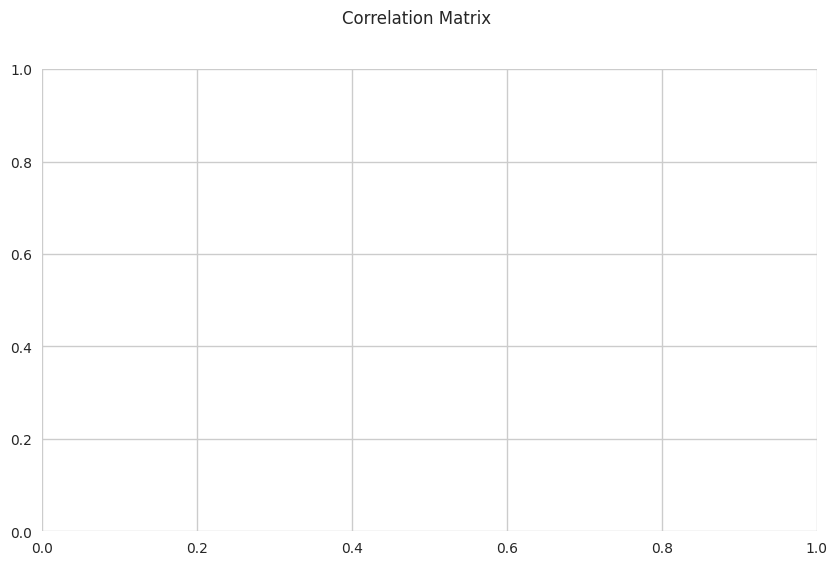

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Correlation Matrix')
sns.heatmap(train.corr(), annot=True, cmap="Greens", linewidths=.5, ax=ax);

The correlation figure below shows that Toxic" comments are clearly correlated with both "obscene" and "insult" comments. Interestingly, "toxic" and "severe_toxic" are only weakly correlated. While we can also observe that, "Obscene" comments and "insult" comments are also highly correlated, which makes perfect sense.


In our experiment, we used densed representation of those text (comments) and their semanticity together. The advantage of using this approach is the best way for fitting neural networks onto a text data (as in our case), as well as less memory usage compared to other sparse representation approaches.





In [44]:
#Convert text to vectors using keras preprocessing library tools

X_train = train["comment_text"].values
X_test  = test["comment_text"].values

y_train = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
y_test  = test[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values






For the first embedding, we used keras preprocessing (Text Preprocessing) libraries. This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf

In [45]:
num_words = 20000 #Max. words to use per toxic comment
max_features = 200000 #Max. number of unique words in embeddinbg vector
max_len = 200 #Max. number of words per toxic comment to be use
embedding_dims = 128 #embedding vector output dimension 
num_epochs = 15 # number of epochs 
val_split = 0.1
batch_size2 = 256 

In [46]:
#toxic comments Tokenization
tokenizer = tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(list(X_train))

#Convert tokenized toxic commnent to sequnces
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
 
# padding the sequences
X_train = pad_sequences(X_train, max_len)
print(X_train)
X_test  = pad_sequences(X_test,  max_len)

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

[[    0     0     0 ...   141    69  3399]
 [    0     0     0 ...  1107  7384   178]
 [    0     0     0 ...     1   676   464]
 ...
 [    0     0     0 ...  3466 13246  4443]
 [    0     0     0 ...   146    33    11]
 [    0     0     0 ...  1518  1716    88]]
X_train shape: (159571, 200)
X_test shape:  (6234, 200)


##We use cross validation to split arrays or matrices of train data into random train and validation subsets

In [47]:
X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, train_size =0.9, random_state=233)

## METHODS (CNN, RNN, LSTM, all using pre-trained (fastTest) embedding)

#### We used early callback functionality that allows you to specify the performance measure to monitor, the trigger, and once triggered. It will stop the training process.

In [48]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=4)

#### Using Precision, AUC, mean etc evaluaiton metrics to evaluate our model

In [49]:
#Import necessary libraries
4# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from  sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.metrics import Accuracy ,Precision, Recall, AUC

def precision(y_true, y_pred):
    
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

  #Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)



def auroc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc






## USING (fastText)  AS  A PRE-TRAINED EMBEDDING

#### Prepare the pre-trained embedding layer

#### Load the FastText Word Embeddng Corpus

In [50]:
#load embeddings
print('loading word embeddings...')
fastText_embeddings_index = {}
with open('wiki.simple.txt', 'r') as f:
  lines = f.readlines()
  for line in lines[1:]:
    values = line.rstrip().rsplit(' ')
    values.pop(-1)
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    fastText_embeddings_index[word] = coefs
        
  print('found %s word vectors' % len(fastText_embeddings_index))

loading word embeddings...
found 111052 word vectors


#### Convert the word embedding into tokenized vector

In [51]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


toxicComments_lines = list()
lines = train['comment_text'].values.tolist()

for line in lines:
    tokens = word_tokenize(line)
    
    #convert to lower case
    tokens = [w.lower() for w in tokens]
    
    #remove punctuation from each word
    table =  str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    #remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    #filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    toxicComments_lines.append(words)


len(toxicComments_lines)



#vectorize the text samples into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(toxicComments_lines)
sequences = tokenizer_obj.texts_to_sequences(toxicComments_lines)

#pad sequences
word_index = tokenizer_obj.word_index
print('Found %s uniquue tokens.' % len(word_index))

toxicComments_pad = pad_sequences(sequences, maxlen=max_len)
comments_tag = train[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
print('Shape of toxic comments tensor', toxicComments_pad.shape)
print('Shape of comment tensor', comments_tag.shape)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Found 214333 uniquue tokens.
Shape of toxic comments tensor (159571, 200)
Shape of comment tensor (159571, 6)


#### Prepare the embedding matrix vectors in order to feed/pass the neural network

In [52]:
#embedding matrix
print('preparing embedding matrix...')
max_nb_words = 100000
fastText_embed_dim = 300 

words_not_found = []
nb_words = min(max_nb_words, len(word_index))
fastText_embedding_matrix = np.zeros((nb_words, fastText_embed_dim))
print(fastText_embedding_matrix .shape)

for word, i in word_index.items():
  
  
  if i >= nb_words:
      continue
  fastText_embedding_vector = fastText_embeddings_index.get(word)
    #print(fastText_embedding_vector.shape)
    
  if (fastText_embedding_vector is not None) and len(fastText_embedding_vector) > 0 and len(fastText_embedding_vector)==300 :
        # words not found in embedding index will be all-zeros.
      fastText_embedding_matrix[i] = fastText_embedding_vector
  else:
      words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(fastText_embedding_matrix, axis=1) == 0))

preparing embedding matrix...
(100000, 300)
number of null word embeddings: 53092


## 1) Convolutional Neural Network (CNN) with FastText

In [53]:
from keras.models import Sequential
CNN_FastText_model = Sequential([
    Embedding(input_dim=fastText_embedding_matrix.shape[0], input_length=max_len, output_dim=fastText_embedding_matrix.shape[1],weights=[fastText_embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    # ... 100 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
    Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    #It will be added after the activation function between a convolutional and a max-pooling layer.
    BatchNormalization(),
    GlobalMaxPool1D(),
    Dropout(0.5),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

In [54]:
#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

In [55]:
CNN_FastText_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy',Precision(), Recall(), AUC()])

#### Visualize the Orchestrated CNN-FastText Model Architecture

In [56]:
CNN_FastText_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          30000000  
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 300)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 200, 100)          120100    
                                                                 
 batch_normalization (BatchN  (None, 200, 100)         400       
 ormalization)                                                   
                                                                 
 global_max_pooling1d (Globa  (None, 100)              0         
 lMaxPooling1D)                                                  
                                                        

In [57]:
#convert the dataset train to Tensorflow tensor
import torch
X_new = np.delete(X_tra,[27728 ,52272 ,52272 ,52272 ,52272, 52272 ,52272 ,129919 ,129919 ,129919 ,129919 ,129919 ,129919], axis=0)
Y_new = np.delete(y_tra,[27728 ,52272 ,52272 ,52272 ,52272, 52272 ,52272 ,129919 ,129919 ,129919 ,129919 ,129919 ,129919], axis=0)
for i in range(Y_new.shape[0]):
  for k in range(Y_new.shape[1]):
    Y_new[i,k]=int(Y_new[i,k])
    
X_new=X_new.astype('float32')
X_new=torch.from_numpy(X_new)

Y_new=Y_new.astype(np.int32)
Y_new=torch.from_numpy(Y_new)
     
X_new=tf.convert_to_tensor(X_new.numpy())
Y_new=tf.convert_to_tensor(Y_new.numpy(), dtype=tf.int32)


In [58]:
#convert the dataset val to Tensorflow tensor
X_new_val=X_val
Y_new_val = y_val
for i in range(Y_new_val.shape[0]):
  for k in range(Y_new_val.shape[1]):
    Y_new_val[i,k]=int(Y_new_val[i,k])
    
X_new_val=X_new_val.astype('float32')
X_new_val=torch.from_numpy(X_new_val)

Y_new_val=Y_new_val.astype(np.int32)
Y_new_val=torch.from_numpy(Y_new_val)
     
X_new_val=tf.convert_to_tensor(X_new_val.numpy())
Y_new_val=tf.convert_to_tensor(Y_new_val.numpy(), dtype=tf.int32)


In [59]:
CNN_FastText_model_fit = CNN_FastText_model.fit(X_new, Y_new, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_new_val, Y_new_val), callbacks=[early])

Epoch 1/15
561/561 [==============================] - 23s 20ms/step - loss: 0.1449 - accuracy: 0.9244 - precision: 0.4177 - recall: 0.0399 - auc: 0.8076 - val_loss: 0.1202 - val_accuracy: 0.9888 - val_precision: 1.0000 - val_recall: 0.0428 - val_auc: 0.8860
Epoch 2/15
561/561 [==============================] - 11s 19ms/step - loss: 0.1107 - accuracy: 0.9848 - precision: 0.8064 - recall: 0.1676 - auc: 0.8744 - val_loss: 0.0933 - val_accuracy: 0.9907 - val_precision: 0.9213 - val_recall: 0.2572 - val_auc: 0.9283
Epoch 3/15
561/561 [==============================] - 11s 19ms/step - loss: 0.0976 - accuracy: 0.9898 - precision: 0.7970 - recall: 0.2909 - auc: 0.9044 - val_loss: 0.0826 - val_accuracy: 0.9910 - val_precision: 0.8903 - val_recall: 0.3520 - val_auc: 0.9431
Epoch 4/15
561/561 [==============================] - 11s 20ms/step - loss: 0.0922 - accuracy: 0.9907 - precision: 0.8006 - recall: 0.3364 - auc: 0.9145 - val_loss: 0.0788 - val_accuracy: 0.9931 - val_precision: 0.9017 - val_r

In [60]:
#Convert the all dataset train to Tensorflow tensor
l=[]
for i in range(y_train.shape[0]):
  for k in range(y_train.shape[1]):
    if type(y_train[i,k]) is not float and type(y_train[i,k]) is not int :
      if y_train[i,k]!='0' and y_train[i,k]!='1':
        l+=[i]
        
a,b=X_train,y_train
a = np.delete(a,l, axis=0)
b = np.delete(b,l, axis=0)

a=a.astype(np.int32)
a=torch.from_numpy(a)

b=b.astype(np.int32)
b=torch.from_numpy(b)
     
b=tf.convert_to_tensor(b.numpy())
a=tf.convert_to_tensor(a.numpy(), dtype=tf.float32)


#### Evaluate the CNN+fastText Model accuracy of our trained model

In [61]:
CNN_FastText_train_score = CNN_FastText_model.evaluate(a, b, batch_size=batch_size2, verbose=1)
print('Train Loss:', CNN_FastText_train_score[0])
print('Train Accuracy:', CNN_FastText_train_score[1])

624/624 [==============================] - 5s 8ms/step - loss: 0.0619 - accuracy: 0.9941 - precision: 0.8181 - recall: 0.5678 - auc: 0.9701
Train Loss: 0.06189849227666855
Train Accuracy: 0.9941216111183167


In [62]:
l1=[]
for i in range(y_test.shape[0]):
  for k in range(y_test.shape[1]):
    if type(y_test[i,k]) is not float and type(y_test[i,k]) is not np.int64 :
      if y_test[i,k]!='0' and y_test[i,k]!='1':
        l1+=[i]
       
        

In [63]:
#convert the all dataset test to Tensorflow Tensor
c,d=X_test,y_test
c = np.delete(c,l1, axis=0)
d = np.delete(d,l1, axis=0)

c=c.astype(np.int32)
c=torch.from_numpy(c)

d=d.astype(np.int32)
d=torch.from_numpy(d)
     
d=tf.convert_to_tensor(d.numpy())
c=tf.convert_to_tensor(c.numpy(), dtype=tf.float32)

#### Evaluate the CNN+FastText accuracy base our test samples

In [64]:
CNN_FastText_test_score = CNN_FastText_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', CNN_FastText_train_score[0])
print('Test Accuracy:', CNN_FastText_train_score[1])

25/25 [==============================] - 1s 10ms/step - loss: 0.5371 - accuracy: 0.9751 - precision: 0.8433 - recall: 0.5376 - auc: 0.8505
Test Loss: 0.06189849227666855
Test Accuracy: 0.9941216111183167


In [65]:
#Predicting......
print('Predicting....')
y_pred = CNN_FastText_model.predict(X_test,batch_size=batch_size2,verbose=1)

Predicting....
25/25 [==============================] - 0s 6ms/step


#### Plot Training & Validation Accuracy with the Loss values of the CNN-FastText Model

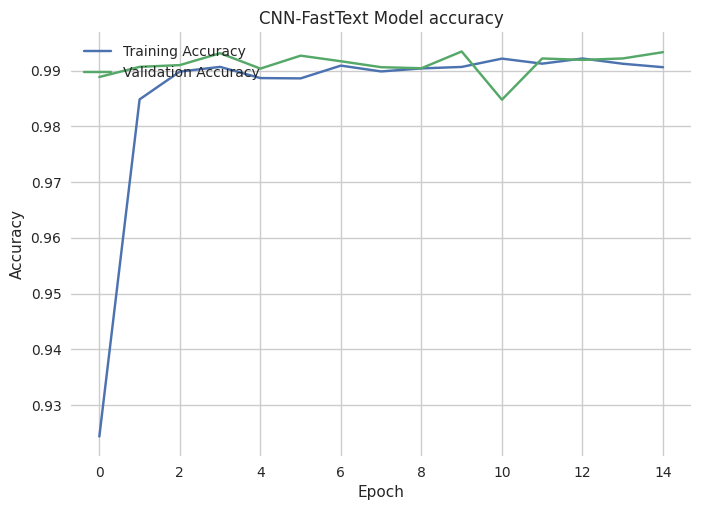

In [66]:
# Plot training & validation accuracy values
plt.plot(CNN_FastText_model_fit.history['accuracy'])
plt.plot(CNN_FastText_model_fit.history['val_accuracy'])
plt.title('CNN-FastText Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

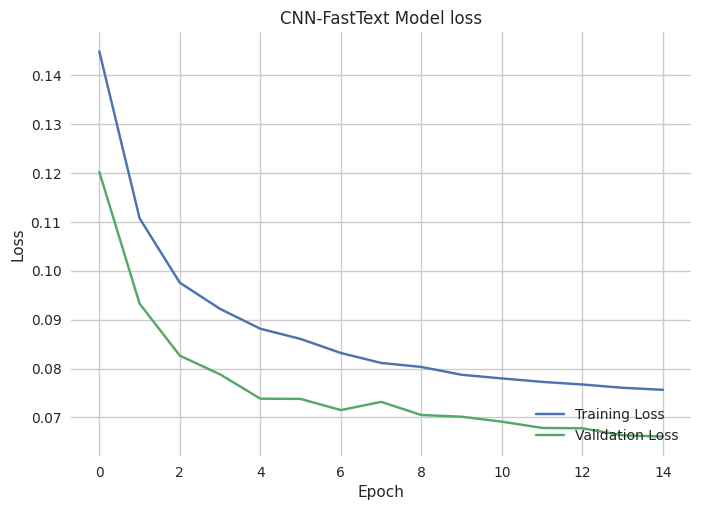

In [67]:
# Plot training & validation loss values
plt.plot(CNN_FastText_model_fit.history['loss'])
plt.plot(CNN_FastText_model_fit.history['val_loss'])
plt.title('CNN-FastText Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 2) Recurrent Neural Network (RNN) with FastText

In [68]:
RNN_FastText_model = Sequential([
    Embedding(input_dim =fastText_embedding_matrix.shape[0], input_length=max_len, output_dim=fastText_embedding_matrix.shape[1],weights=[fastText_embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Fully-connected RNN where the output is to be fed back to input.
    SimpleRNN(25, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

In [69]:
#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

In [70]:
RNN_FastText_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy',Precision(), Recall(), AUC()])

#### Visualize the Orchestrated RNN-fastText Model Architecture

In [71]:
RNN_FastText_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 300)          30000000  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 300)         0         
 lDropout1D)                                                     
                                                                 
 simple_rnn (SimpleRNN)      (None, 200, 25)           8150      
                                                                 
 batch_normalization_1 (Batc  (None, 200, 25)          100       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 200, 25)           0         
                                                                 
 global_max_pooling1d_1 (Glo  (None, 25)              

In [72]:
RNN_FastText_model_fit = RNN_FastText_model.fit(X_new, Y_new, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_new_val, Y_new_val), callbacks=[early])

Epoch 1/15
561/561 [==============================] - 113s 199ms/step - loss: 0.1431 - accuracy: 0.9653 - precision_1: 0.0585 - recall_1: 0.0015 - auc_1: 0.7816 - val_loss: 0.1778 - val_accuracy: 0.9320 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_auc_1: 0.8077
Epoch 2/15
561/561 [==============================] - 104s 185ms/step - loss: 0.1209 - accuracy: 0.9882 - precision_1: 0.7687 - recall_1: 0.0967 - auc_1: 0.8463 - val_loss: 0.1739 - val_accuracy: 0.9934 - val_precision_1: 0.4530 - val_recall_1: 0.2238 - val_auc_1: 0.8854
Epoch 3/15
561/561 [==============================] - 108s 193ms/step - loss: 0.1231 - accuracy: 0.9561 - precision_1: 0.7353 - recall_1: 0.1035 - auc_1: 0.8399 - val_loss: 0.1322 - val_accuracy: 0.9934 - val_precision_1: 0.7089 - val_recall_1: 0.0156 - val_auc_1: 0.8794
Epoch 4/15
561/561 [==============================] - 105s 186ms/step - loss: 0.1049 - accuracy: 0.9926 - precision_1: 0.8025 - recall_1: 0.2283 - auc_1: 0.8867 - val_loss: 0.1

#### Evaluate the RNN+fastText Model accuracy of our trained model

In [73]:
RNN_FastText_train_score = RNN_FastText_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Train Loss:', RNN_FastText_train_score[0])
print('Train Accuracy:', RNN_FastText_train_score[1])

25/25 [==============================] - 2s 19ms/step - loss: 0.6727 - accuracy: 0.9644 - precision_1: 0.9025 - recall_1: 0.2660 - auc_1: 0.8631
Train Loss: 0.672666609287262
Train Accuracy: 0.9643888473510742


#### Evaluate the RNN+FastText accuracy base our test samples

In [74]:
RNN_FastText_test_score = RNN_FastText_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', RNN_FastText_test_score[0])
print('Test Accuracy:', RNN_FastText_test_score[1])

25/25 [==============================] - 1s 20ms/step - loss: 0.6727 - accuracy: 0.9644 - precision_1: 0.9025 - recall_1: 0.2660 - auc_1: 0.8631
Test Loss: 0.672666609287262
Test Accuracy: 0.9643888473510742


In [75]:
#Predicting......
print('Predicting....')
y_pred = RNN_FastText_model.predict(X_test,batch_size=batch_size2,verbose=1)

Predicting....
25/25 [==============================] - 1s 18ms/step


#### Plot Training & Validation Accuracy with the Loss values of the RNN-fastText Model

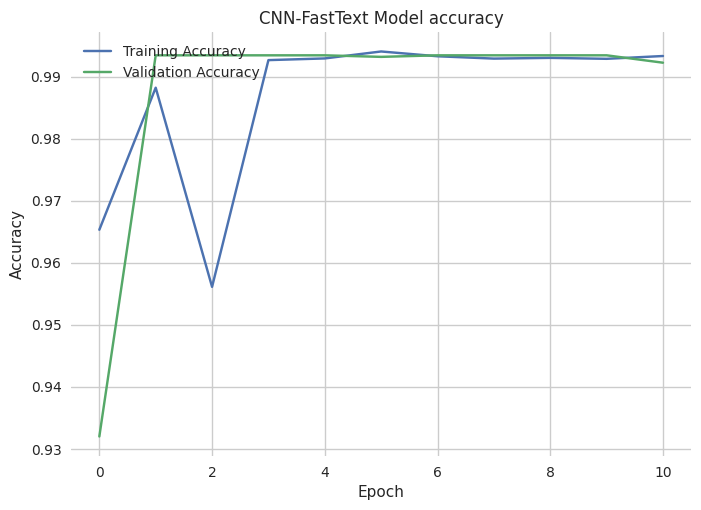

In [76]:
# Plot training & validation accuracy values
plt.plot(RNN_FastText_model_fit.history['accuracy'])
plt.plot(RNN_FastText_model_fit.history['val_accuracy'])
plt.title('CNN-FastText Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

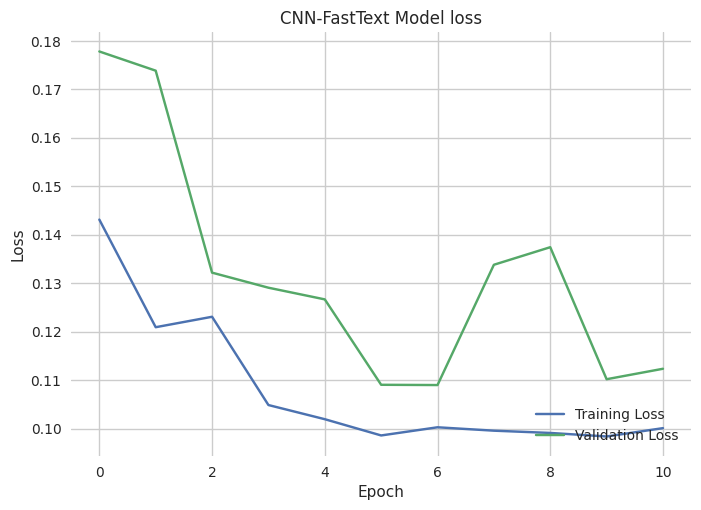

In [77]:
# Plot training & validation loss values
plt.plot(RNN_FastText_model_fit.history['loss'])
plt.plot(RNN_FastText_model_fit.history['val_loss'])
plt.title('CNN-FastText Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [78]:
# predict probabilities for test set
yhat_probs = RNN_FastText_model.predict(X_test, verbose=1)
print(yhat_probs)
# predict crisp classes for test set

yhat_classes=tf.argmax(yhat_probs, axis=1)
print(yhat_classes.shape)

195/195 [==============================] - 3s 17ms/step
[[0.10058546 0.00631893 0.05973652 0.00535431 0.05038078 0.01452835]
 [0.21366213 0.02840186 0.14528811 0.01306847 0.14156348 0.03392889]
 [0.87133753 0.297003   0.8160607  0.04684081 0.64441854 0.1309197 ]
 ...
 [0.13807847 0.01315743 0.083821   0.00709721 0.08185099 0.02043808]
 [0.18698566 0.01690127 0.19120367 0.0123844  0.11016166 0.02853548]
 [0.68786955 0.24153191 0.6399704  0.05038165 0.52580667 0.1250551 ]]
(6234,)


In [79]:
test=np.zeros(yhat_classes.shape[0])
for i in range(yhat_classes.shape[0]):
  if y_test[i,yhat_classes[i]]!=1:
    test[i]=tf.argmax(y_test[i,])
  else:
    test[i]= yhat_classes[i] 


In [80]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test, yhat_classes,average='macro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test, yhat_classes,average='macro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test, yhat_classes,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.973853
Precision: 0.359995
Recall: 0.297989
F1 score: 0.320573


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3) LSTM with fastText

In [81]:
LSTM_FastText_model = Sequential([
    Embedding(input_dim =fastText_embedding_matrix.shape[0], input_length=max_len, output_dim=fastText_embedding_matrix.shape[1],weights=[fastText_embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    LSTM(25, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

LSTM_FastText_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy',Precision(), Recall(), AUC()])

### Visualize the Orchestrated LSTM-fastText Model Architecture

In [82]:
LSTM_FastText_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 300)          30000000  
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 200, 300)         0         
 lDropout1D)                                                     
                                                                 
 lstm (LSTM)                 (None, 200, 25)           32600     
                                                                 
 batch_normalization_2 (Batc  (None, 200, 25)          100       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 200, 25)           0         
                                                                 
 global_max_pooling1d_2 (Glo  (None, 25)              

In [83]:
LSTM_FastText_model_fit = LSTM_FastText_model.fit(X_new, Y_new, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_new_val, Y_new_val), callbacks=[early])

Epoch 1/15
561/561 [==============================] - 13s 17ms/step - loss: 0.1077 - accuracy: 0.9654 - precision_2: 0.7343 - recall_2: 0.2406 - auc_2: 0.8833 - val_loss: 0.1044 - val_accuracy: 0.9929 - val_precision_2: 0.9233 - val_recall_2: 0.2914 - val_auc_2: 0.9412
Epoch 2/15
561/561 [==============================] - 9s 16ms/step - loss: 0.0842 - accuracy: 0.9928 - precision_2: 0.8023 - recall_2: 0.3996 - auc_2: 0.9293 - val_loss: 0.0950 - val_accuracy: 0.9934 - val_precision_2: 0.8670 - val_recall_2: 0.4493 - val_auc_2: 0.9558
Epoch 3/15
561/561 [==============================] - 8s 15ms/step - loss: 0.0793 - accuracy: 0.9939 - precision_2: 0.8050 - recall_2: 0.4346 - auc_2: 0.9384 - val_loss: 0.0932 - val_accuracy: 0.9934 - val_precision_2: 0.8374 - val_recall_2: 0.5082 - val_auc_2: 0.9618
Epoch 4/15
561/561 [==============================] - 9s 15ms/step - loss: 0.0770 - accuracy: 0.9941 - precision_2: 0.8062 - recall_2: 0.4459 - auc_2: 0.9424 - val_loss: 0.0938 - val_accuracy:

### Evaluate the LSTM+fastText train and test score

In [84]:
#train
LSTM_FastText_train_score = LSTM_FastText_model.evaluate(X_new, Y_new, batch_size=batch_size2, verbose=1)
print('Train Loss:', LSTM_FastText_train_score[0])
print('Train Accuracy:', LSTM_FastText_train_score[1])

#test
LSTM_FastText_test_score = LSTM_FastText_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', LSTM_FastText_test_score[0])
print('Test Accuracy:', LSTM_FastText_test_score[1])

561/561 [==============================] - 4s 7ms/step - loss: 0.0607 - accuracy: 0.9942 - precision_2: 0.8689 - recall_2: 0.5299 - auc_2: 0.9709
Train Loss: 0.0607009194791317
Train Accuracy: 0.994164764881134
25/25 [==============================] - 1s 8ms/step - loss: 0.5236 - accuracy: 0.9748 - precision_2: 0.8966 - recall_2: 0.5305 - auc_2: 0.8617
Test Loss: 0.523562490940094
Test Accuracy: 0.9748155474662781


### Plot Training & Validation Accuracy with the Loss values of the LSTM-fastText Model



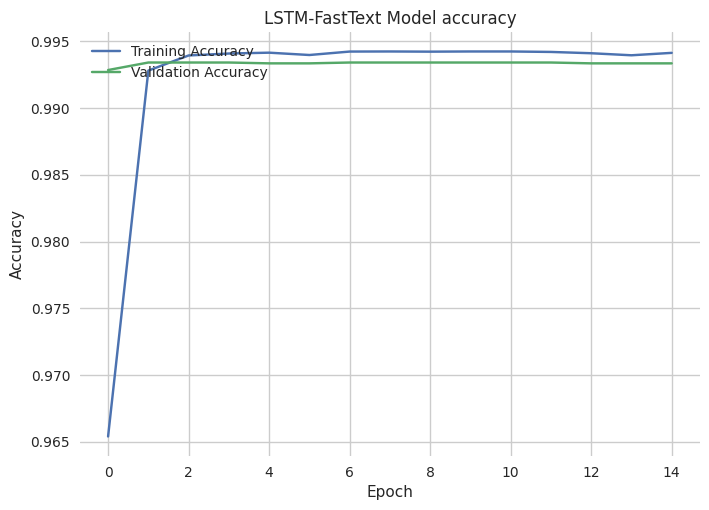

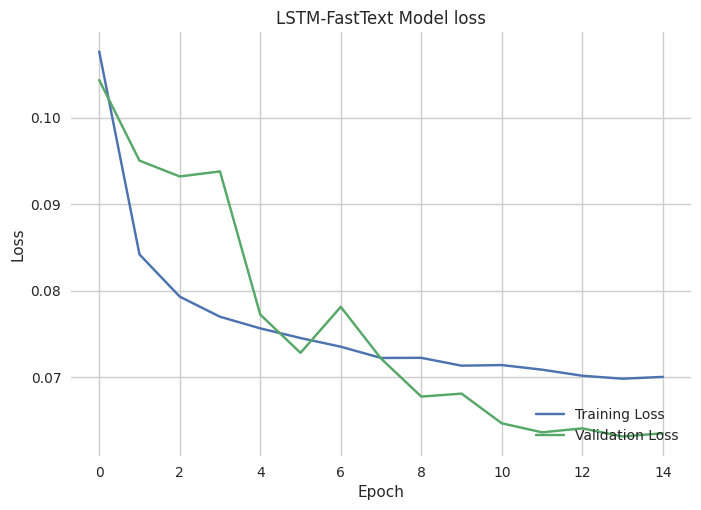

In [85]:
### Plot Training & Validation Accuracy with the Loss values of the LSTM-Glove Model# Plot training & validation accuracy values
plt.plot(LSTM_FastText_model_fit.history['accuracy'])
plt.plot(LSTM_FastText_model_fit.history['val_accuracy'])
plt.title('LSTM-FastText Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(LSTM_FastText_model_fit.history['loss'])
plt.plot(LSTM_FastText_model_fit.history['val_loss'])
plt.title('LSTM-FastText Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 4) Bidirecitional LSTM with fastText

In [86]:
Bil_LSTM_FastText_model = Sequential([
    Embedding(input_dim =fastText_embedding_matrix.shape[0], input_length=max_len, output_dim=fastText_embedding_matrix.shape[1],weights=[fastText_embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    Bidirectional(LSTM(25, return_sequences=True)),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])


Bil_LSTM_FastText_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy',Precision(), Recall(), AUC()])

### Visualize the Orchestrated Bidirectional LSTM-FastText Model Architecture

In [87]:
Bil_LSTM_FastText_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 300)          30000000  
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 200, 300)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 200, 50)          65200     
 l)                                                              
                                                                 
 batch_normalization_3 (Batc  (None, 200, 50)          200       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 200, 50)           0         
                                                      

In [88]:
Bil_LSTM_FastText_model_fit = Bil_LSTM_FastText_model.fit(X_new, Y_new, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_new_val, Y_new_val), callbacks=[early])

Epoch 1/15
561/561 [==============================] - 21s 31ms/step - loss: 0.1064 - accuracy: 0.9368 - precision_3: 0.7303 - recall_3: 0.2767 - auc_3: 0.8897 - val_loss: 0.1100 - val_accuracy: 0.9652 - val_precision_3: 0.9286 - val_recall_3: 0.3144 - val_auc_3: 0.9502
Epoch 2/15
561/561 [==============================] - 18s 32ms/step - loss: 0.0800 - accuracy: 0.9896 - precision_3: 0.7992 - recall_3: 0.4312 - auc_3: 0.9378 - val_loss: 0.1162 - val_accuracy: 0.9728 - val_precision_3: 0.8222 - val_recall_3: 0.5296 - val_auc_3: 0.9593
Epoch 3/15
561/561 [==============================] - 16s 28ms/step - loss: 0.0733 - accuracy: 0.9928 - precision_3: 0.8127 - recall_3: 0.4751 - auc_3: 0.9487 - val_loss: 0.0947 - val_accuracy: 0.9926 - val_precision_3: 0.8387 - val_recall_3: 0.5552 - val_auc_3: 0.9661
Epoch 4/15
561/561 [==============================] - 16s 29ms/step - loss: 0.0706 - accuracy: 0.9933 - precision_3: 0.8111 - recall_3: 0.4979 - auc_3: 0.9533 - val_loss: 0.0914 - val_accura

### Evaluate the Bidirectional LSTM+FastText train and test score

In [89]:
#train
Bil_LSTM_FastText_train_score = Bil_LSTM_FastText_model.evaluate(X_new, Y_new, batch_size=batch_size2, verbose=1)
print('Train Loss:', Bil_LSTM_FastText_train_score[0])
print('Train Accuracy:', Bil_LSTM_FastText_train_score[1])

#test
Bil_LSTM_FastText_test_score = Bil_LSTM_FastText_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', Bil_LSTM_FastText_test_score[0])
print('Test Accuracy:', Bil_LSTM_FastText_test_score[1])

561/561 [==============================] - 7s 12ms/step - loss: 0.0588 - accuracy: 0.9913 - precision_3: 0.8374 - recall_3: 0.6103 - auc_3: 0.9751
Train Loss: 0.05878765508532524
Train Accuracy: 0.9912749528884888
25/25 [==============================] - 1s 12ms/step - loss: 0.4570 - accuracy: 0.9710 - precision_3: 0.8823 - recall_3: 0.6039 - auc_3: 0.8850
Test Loss: 0.45695680379867554
Test Accuracy: 0.9709656834602356


### Plot Training & Validation Accuracy with the Loss values of the Bidirectional LSTM-fastText Model


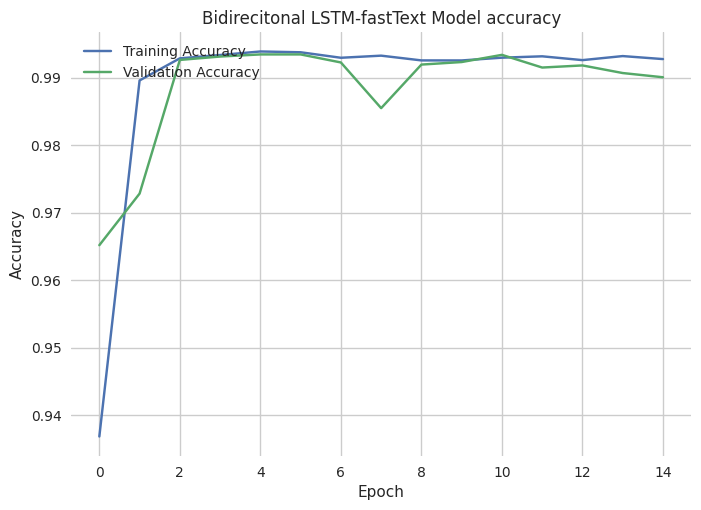

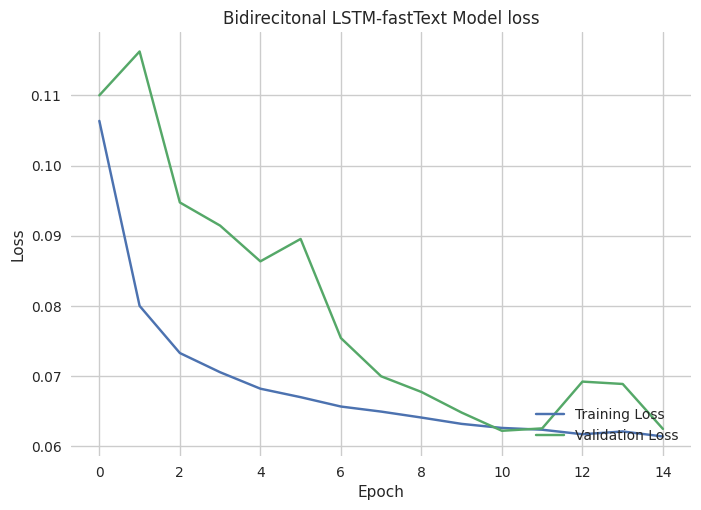

In [90]:

# Plot training & validation accuracy values
plt.plot(Bil_LSTM_FastText_model_fit.history['accuracy'])
plt.plot(Bil_LSTM_FastText_model_fit.history['val_accuracy'])
plt.title('Bidirecitonal LSTM-fastText Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Bil_LSTM_FastText_model_fit.history['loss'])
plt.plot(Bil_LSTM_FastText_model_fit.history['val_loss'])
plt.title('Bidirecitonal LSTM-fastText Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

from tensorflow.keras.models import Model## 5) Gated Recurrent (GRU) with fastText

In [91]:
from tensorflow.keras.models import Model
sequence_input = Input(shape=(max_len, ))
model = Embedding(input_dim =fastText_embedding_matrix.shape[0], input_length=max_len, output_dim=fastText_embedding_matrix.shape[1],weights=[fastText_embedding_matrix], trainable=False)(sequence_input)
model = SpatialDropout1D(0.2)(model)
model = GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1)(model)
model = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool]) 
preds = Dense(6, activation="sigmoid")(model)
GRU_FastText_model = Model(sequence_input, preds)
GRU_FastText_model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy',Precision(), Recall(), AUC()])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### Visualize the Orchestrated GRU+fastText MODEL Architecture

In [92]:
GRU_FastText_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 200, 300)     30000000    ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d_4 (SpatialDr  (None, 200, 300)    0           ['embedding_4[0][0]']            
 opout1D)                                                                                         
                                                                                                  
 gru (GRU)                      (None, 200, 128)     165120      ['spatial_dropout1d_4[0][0]']

In [93]:
GRU_FastText_model_fit = GRU_FastText_model.fit(X_new, Y_new, batch_size=batch_size2, epochs=3, validation_data=(X_new_val, Y_new_val), callbacks=[early])

Epoch 1/3
561/561 [==============================] - 422s 746ms/step - loss: 0.1071 - accuracy: 0.9418 - precision_4: 0.7791 - recall_4: 0.2382 - auc_4: 0.8850 - val_loss: 0.0769 - val_accuracy: 0.9925 - val_precision_4: 0.8511 - val_recall_4: 0.4323 - val_auc_4: 0.9467
Epoch 2/3
561/561 [==============================] - 415s 740ms/step - loss: 0.0722 - accuracy: 0.9876 - precision_4: 0.8250 - recall_4: 0.4856 - auc_4: 0.9508 - val_loss: 0.0651 - val_accuracy: 0.9925 - val_precision_4: 0.8446 - val_recall_4: 0.5349 - val_auc_4: 0.9639
Epoch 3/3
561/561 [==============================] - 420s 747ms/step - loss: 0.0638 - accuracy: 0.9884 - precision_4: 0.8265 - recall_4: 0.5460 - auc_4: 0.9631 - val_loss: 0.0600 - val_accuracy: 0.9932 - val_precision_4: 0.8471 - val_recall_4: 0.5685 - val_auc_4: 0.9691


### Evaluate the GRU+FastText Model train and test score

In [94]:
#Train
GRU_FastText_train_score = GRU_FastText_model.evaluate(X_new, Y_new, batch_size=batch_size2, verbose=1)
print('Train Loss:', GRU_FastText_train_score[0])
print('Train Accuracy:', GRU_FastText_train_score[1])

#Test
GRU_FastText_test_score = GRU_FastText_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', GRU_FastText_test_score[0])
print('Test Accuracy:', GRU_FastText_test_score[1])

561/561 [==============================] - 35s 61ms/step - loss: 0.0556 - accuracy: 0.9939 - precision_4: 0.8537 - recall_4: 0.5861 - auc_4: 0.9734
Train Loss: 0.055622827261686325
Train Accuracy: 0.9938722848892212
25/25 [==============================] - 2s 60ms/step - loss: 0.5132 - accuracy: 0.9726 - precision_4: 0.8861 - recall_4: 0.5723 - auc_4: 0.8864
Test Loss: 0.5132328867912292
Test Accuracy: 0.9725697636604309


### Plot Training & Validation Accuracy with the Loss values of the GRU+ FastText Model

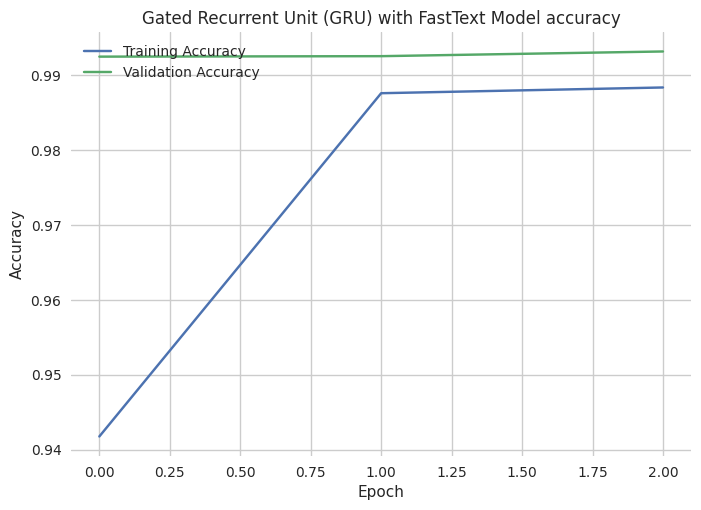

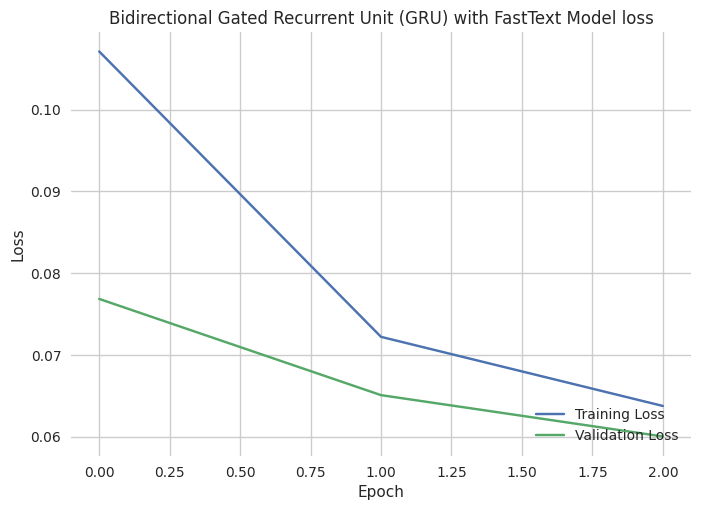

In [95]:
# Plot training & validation accuracy values
plt.plot(GRU_FastText_model_fit.history['accuracy'])
plt.plot(GRU_FastText_model_fit.history['val_accuracy'])
plt.title('Gated Recurrent Unit (GRU) with FastText Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(GRU_FastText_model_fit.history['loss'])
plt.plot(GRU_FastText_model_fit.history['val_loss'])
plt.title('Bidirectional Gated Recurrent Unit (GRU) with FastText Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [105]:
print(CNN_FastText_model_fit.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'auc', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall', 'val_auc'])


# Evaluation of Experiment With fastText Pre-trained Embedding

#### Computing the highest of the evaluation matrics (per model) 

In [112]:
trace = go.Table(
    header=dict(values=['Model', 'Loss', 'Accuracy',  'Precision', 'recall', 'auroc'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[['CNN with fastText', 'RNNs with fastText', 'LSTM with fastText', ' Bidirectional LSTM with fastText', 'GRU with fastText'],
                       [
                        #Loss Evaluation
                        round(np.max(CNN_FastText_model_fit.history['loss']), 3), round(np.max(RNN_FastText_model_fit.history['loss']), 3), 
                        round(np.max(LSTM_FastText_model_fit.history['loss']), 3), round(np.max(Bil_LSTM_FastText_model_fit.history['loss']), 3), round(np.max(GRU_FastText_model_fit.history['loss']), 3)],
                        
                        #Accuracy Evaluation
                        [round(np.max(CNN_FastText_model_fit.history['accuracy']), 3), round(np.max(RNN_FastText_model_fit.history['accuracy']), 3), 
                        round(np.max(LSTM_FastText_model_fit.history['accuracy']), 3), round(np.max(Bil_LSTM_FastText_model_fit.history['accuracy']), 3), round(np.max(GRU_FastText_model_fit.history['accuracy']), 3)],
               
                        
						
                       
						             
                        #Precision Evaluation precision
                        [round(np.max(CNN_FastText_model_fit.history['precision']), 3), round(np.max(RNN_FastText_model_fit.history[ 'precision_1']), 3), 
                        round(np.max(LSTM_FastText_model_fit.history[ 'precision_2']), 3), round(np.max(Bil_LSTM_FastText_model_fit.history[ 'precision_3']), 3), round(np.max(GRU_FastText_model_fit.history['precision_4']), 3)],
						
                        #ROC AUC Evaluation auroc
                        [round(np.max(CNN_FastText_model_fit.history['auc']), 3), round(np.max(RNN_FastText_model_fit.history['auc_1']), 3), 
                        round(np.max(LSTM_FastText_model_fit.history['auc_2']), 3), round(np.max(Bil_LSTM_FastText_model_fit.history['auc_3']), 3), round(np.max(GRU_FastText_model_fit.history['auc_4']), 3)],
                       
                        #Recall Evaluation
                        [round(np.max(CNN_FastText_model_fit.history[ 'recall']), 3), round(np.max(RNN_FastText_model_fit.history['recall_1']), 3), 
                        round(np.max(LSTM_FastText_model_fit.history['recall_2']), 3), round(np.max(Bil_LSTM_FastText_model_fit.history['recall_3']), 3), round(np.max(GRU_FastText_model_fit.history['recall_4']), 3)]],
    line = dict(color='#7D7F80'),
    fill = dict(color='#EDFAFF'),
    align = ['left'] * 5))

layout = dict(width=800, height=400)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(data, filename = 'fastText_trained_embedding_with the max of the evaluation matrics (per model) _table')

### Score Confusion Table

In [113]:
# concat all training, validation and testing accuracy scores

CNN_FastText_Accuracy = ['Convolutional Neural Network (CNN) with fastText', 
                np.max(CNN_FastText_model_fit.history['accuracy']), 
                np.max(CNN_FastText_model_fit.history['val_accuracy']), 
                CNN_FastText_test_score[1]]

RNN_FastText_Accuracy = ['Recurrent Neural Networks (RNNs) with fastText', 
                np.max(RNN_FastText_model_fit.history['accuracy']), 
                np.max(RNN_FastText_model_fit.history['val_accuracy']), 
                RNN_FastText_test_score[1]]

LSTM_FastText_Accuracy = ['LSTM with fastText', 
                  np.max(LSTM_FastText_model_fit.history['accuracy']), 
                  np.max(LSTM_FastText_model_fit.history['val_accuracy']), 
                  LSTM_FastText_test_score[1]]

Bidirectional_LSTM_FastText_Accuracy = ['Bidirectional LSTM with fastText', 
                    np.max(Bil_LSTM_FastText_model_fit.history['accuracy']), 
                    np.max(Bil_LSTM_FastText_model_fit.history['val_accuracy']), 
                    Bil_LSTM_FastText_test_score[1]]

GRU_FastText_Accuracy = ['GRU with fastText', 
                    np.max(GRU_FastText_model_fit.history['accuracy']), 
                    np.max(GRU_FastText_model_fit.history['val_accuracy']), 
                    GRU_FastText_test_score[1]]



# create dataframe
experimentalResult = pd.DataFrame([CNN_FastText_Accuracy])
# append all other scores
experimentalResult = experimentalResult.append([CNN_FastText_Accuracy, RNN_FastText_Accuracy, LSTM_FastText_Accuracy, Bidirectional_LSTM_FastText_Accuracy, 
                                                GRU_FastText_Accuracy])


# beautify the new dataframe
experimentalResult.columns = ['Model', 'Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
experimentalResult.set_index(['Model'], inplace=True)
experimentalResult
print(experimentalResult)

                                                  Training Accuracy  \
Model                                                                 
Convolutional Neural Network (CNN) with fastText           0.992159   
Convolutional Neural Network (CNN) with fastText           0.992159   
Recurrent Neural Networks (RNNs) with fastText             0.994039   
LSTM with fastText                                         0.994248   
Bidirectional LSTM with fastText                           0.993858   
GRU with fastText                                          0.988364   

                                                  Validation Accuracy  \
Model                                                                   
Convolutional Neural Network (CNN) with fastText              0.99342   
Convolutional Neural Network (CNN) with fastText              0.99342   
Recurrent Neural Networks (RNNs) with fastText                0.99342   
LSTM with fastText                                            0.99

<ipython-input-113-bad32a5e02eb>:33: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

